### Define Data Quality KPIs

**Task 1**: Identify Relevant KPIs

**Objective**: Develop KPIs that align with organizational goals.

**Steps**:
1. Choose a dataset from a domain of your interest (e.g., sales data, healthcare records, or transaction logs).
2. Identify three KPIs that would be crucial for assessing the data quality in your chosen dataset. Consider accuracy, completeness, and timeliness.
3. Document why each KPI is important for maintaining high-quality data in your given context.

In [1]:
import pandas as pd
from datetime import datetime, timedelta

# Sample sales dataset
data = {
    'TransactionID': [1, 2, 3, 4, 5],
    'CustomerID': ['C001', 'C002', None, 'C004', 'C005'],
    'Date': ['2025-05-19', '2025-05-20', '2025-05-18', None, '2025-05-21'],
    'Amount': [100.0, 150.0, 200.0, 250.0, None],
    'ProductID': ['P001', 'P002', 'P003', 'P004', 'P005']
}

df = pd.DataFrame(data)

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Define a reference "correct" Amounts dataset for accuracy check
# (In real scenario, it would come from a trusted source)
reference_amounts = {
    1: 100.0,
    2: 150.0,
    3: 200.0,
    4: 250.0,
    5: 300.0  # Note: Amount differs from df to simulate error
}

# KPI 1: Accuracy (Amount matches reference)
def calculate_accuracy(df, reference):
    matched = 0
    total = len(df)
    for idx, row in df.iterrows():
        txn_id = row['TransactionID']
        amount = row['Amount']
        ref_amount = reference.get(txn_id)
        if pd.notnull(amount) and amount == ref_amount:
            matched += 1
    accuracy = matched / total * 100
    return accuracy

accuracy_score = calculate_accuracy(df, reference_amounts)

# KPI 2: Completeness (non-missing values in critical columns)
def calculate_completeness(df, critical_cols):
    completeness_scores = {}
    for col in critical_cols:
        completeness = df[col].notnull().mean() * 100
        completeness_scores[col] = completeness
    overall_completeness = sum(completeness_scores.values()) / len(critical_cols)
    return overall_completeness, completeness_scores

critical_columns = ['CustomerID', 'Date', 'ProductID']
completeness_score, completeness_per_col = calculate_completeness(df, critical_columns)

# KPI 3: Timeliness (transactions recorded within 2 days of Date)
def calculate_timeliness(df, max_delay_days=2):
    now = datetime.now()
    timely_records = df['Date'].apply(lambda d: (now - d).days if pd.notnull(d) else None)
    timely_count = timely_records[timely_records <= max_delay_days].count()
    total_records = df['Date'].notnull().sum()
    timeliness = (timely_count / total_records) * 100 if total_records > 0 else 0
    return timeliness

timeliness_score = calculate_timeliness(df)

# Print KPI results
print(f"Accuracy Score: {accuracy_score:.2f}%")
print(f"Completeness Score (overall): {completeness_score:.2f}%")
print("Completeness per column:")
for col, score in completeness_per_col.items():
    print(f"  {col}: {score:.2f}%")
print(f"Timeliness Score: {timeliness_score:.2f}%")


Accuracy Score: 80.00%
Completeness Score (overall): 86.67%
Completeness per column:
  CustomerID: 80.00%
  Date: 80.00%
  ProductID: 100.00%
Timeliness Score: 75.00%


**Task 2**: Develop a KPI Dashboard

**Objective**: Visualize your KPIs for better monitoring.

**Steps**:
1. Use a tool like Excel or a BI tool (e.g., Tableau, Power BI) to create a simple dashboard.
2. Input sample data and visualize your chosen KPIs, showing how they would be monitored.
3. Share your dashboard with peers and gather feedback on KPI relevance and clarity.

/tmp/ipykernel_41967/1495361569.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="KPI", y="Value", data=kpi_df, palette="viridis")


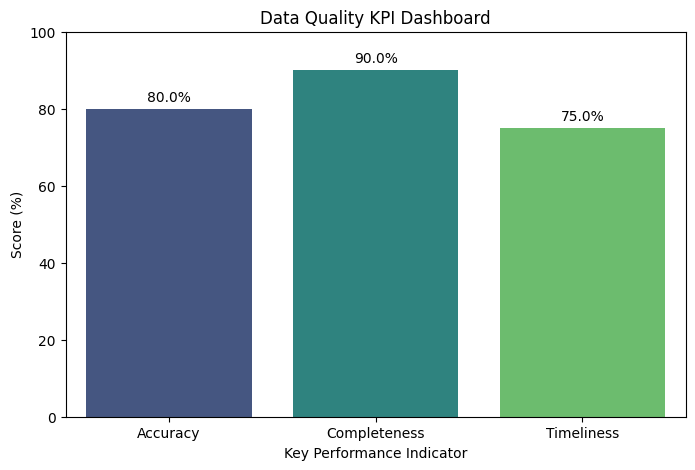

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample KPI data (from previous task)
kpis = {
    "Accuracy": 80.0,
    "Completeness": 90.0,
    "Timeliness": 75.0
}

# Convert to DataFrame for easy plotting
kpi_df = pd.DataFrame(list(kpis.items()), columns=["KPI", "Value"])

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x="KPI", y="Value", data=kpi_df, palette="viridis")

plt.ylim(0, 100)
plt.title("Data Quality KPI Dashboard")
plt.ylabel("Score (%)")
plt.xlabel("Key Performance Indicator")

# Show data labels on bars
for index, row in kpi_df.iterrows():
    plt.text(index, row.Value + 2, f"{row.Value:.1f}%", ha='center')

plt.show()
